# AV Scheduling for household

### Initialize
* Inital functions and package
* Read input

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import networkx as nx
%matplotlib inline
from DYNASMART_Process import *
import DYNASMART_Process as dy
import AV_functions as av

In [2]:
#Read in the basic traveler and trips informationa and joint the houshold id
# traveler_info=pd.read_csv('input/traveler.csv')
# personData=pd.read_csv('input/personData_1.csv')
# hh_temp=personData[['person_id','hh_id']]
# traveler_trips=pd.merge(traveler_info,hh_temp,how='left',on=['person_id'])
traveler_trips=pd.read_csv('input/traveler_trip_info.csv')
num_zones,num_nodes,num_links,node_detail,node_id,link_detail,link_id=dy.read_network('input/network.dat')
nodexy=dy.read_xy('input/xy.dat')
#origins,destinations=dy.read_origin_destion('input/origin.dat','input/destination.dat')

### Draw the sub-area network

C:\Users\Alex\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Alex\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Alex\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Alex\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0

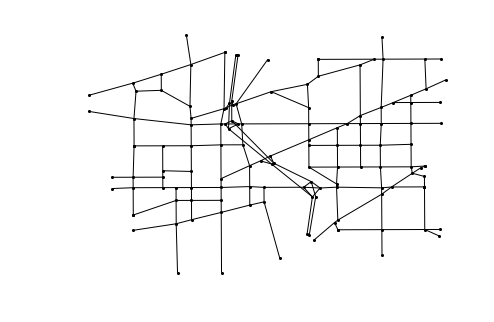

In [3]:
cluster_highlight([])

### Sample Household
Select household 2105189 for intial analysis

In [4]:
traveler_trips.head()

,person_id,num_trips,value_of_time,trip_counter,ActivityTime,tripmode,orig_purpose,dest_purpose,orig_maz,orig_taz,dest_maz,dest_taz,starttimeinterval,starttime,hh_id,origin_node,destination_node
0,8600957,11,0.1164,1,24.0,1,Home,Shop,1,1,62,16,1,1.0,2744264,9675,10757
1,8600957,11,0.1164,2,32.0,3,Shop,eatingout,62,16,20,5,1,31.0,2744264,10542,10057
2,8600957,11,0.1164,3,39.0,1,eatingout,Maintenance,20,5,3,1,1,68.0,2744264,9864,9675
3,8600957,11,0.1164,4,198.0,3,Maintenance,Home,3,1,1,1,1,109.0,2744264,9674,9737
4,8600957,11,0.1164,5,191.0,1,Home,work,1,1,14,4,8,308.0,2744264,9738,9673


10


C:\Users\Alex\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Alex\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Alex\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Alex\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0

9
4
7


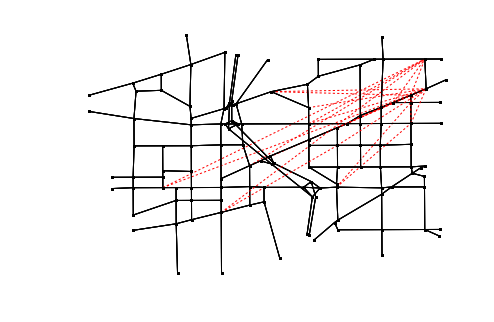

In [5]:
target_hh=2105189
people_in_hh=traveler_trips[traveler_trips['hh_id']==2105189]['person_id'].unique()
for person in people_in_hh:
    #creat trip-chain-origin-destination-list
    num_trips=traveler_trips[traveler_trips['person_id']==person]['num_trips'].iloc[0]
    print(num_trips)
    trip_chain_or=traveler_trips[traveler_trips['person_id']==person][['origin_node','destination_node']]
    trip_chain_or['origin_node'].iloc[1:num_trips-1]=trip_chain_or['destination_node'].iloc[0:num_trips-2].tolist()
    trip_chain_or['origin_node'].iloc[num_trips-1]=trip_chain_or['destination_node'].iloc[num_trips-2]
    #draw the graph
    av.trip_chain_highlight(trip_chain_or,node_detail,link_detail,nodexy)
#traveler_trips[traveler_trips['hh_id']==2105189]

Visulization the sample household activity chains

In [6]:
# input_path='input'
# output_path='input'
# file=open(input_path+'/traveler.dat')
# num_lines = sum(1 for line in file)
# file.close()
# file=open(input_path+'/traveler.dat')
# linecounter=0
# j=0
# traveler_flag=0
# for line in file:
#     line_temp=line.split()
#     if linecounter==0:
#         num_traveler=int(line_temp[0])
#         max_num_trips=line_temp[1]
#         traveler_flag=1
#         traveler_info=pd.DataFrame(index=range(num_lines-num_traveler-3),columns=('person_id','num_trips','value_of_time','trip_counter',
#                                 'ActivityTime','tripmode','orig_purpose','dest_purpose', 
#                                  'orig_maz',  'orig_taz','dest_maz','dest_taz',
#                                 'starttimeinterval','starttime'))
#     elif linecounter!=1 and linecounter!=2:
#         if traveler_flag==1:
#             #read the traveler information
#             traveler_id=line_temp[2]
#             num_trips=int(line_temp[4])
#             value_of_time=float(line_temp[9])
#             traveler_counter=int(line_temp[0])-1
#             trip_temp=[]
#             trip_counter=1
#             traveler_flag=0
#         else: 
#             trip_temp=[line_temp[i] for i in [1,2,3,4,5,6,7,8,12,13]]
#             trip_info=[traveler_id,num_trips,value_of_time,trip_counter]
#             trip_info.extend(trip_temp)
#             traveler_info.loc[j] = trip_info
#             j+=1
#             if trip_counter==num_trips:
#                 traveler_flag=1
#             trip_counter+=1
#     linecounter=linecounter+1
# #Add the household information to the dataframe
# traveler_info.to_csv('input/traveler_info.dat',index=False)
# traveler_info=pd.read_csv('input/traveler_info.dat')
# personData=pd.read_csv('input/personData_1.csv')
# hh_temp=personData[['person_id','hh_id']]
# traveler_infos=pd.merge(traveler_info,hh_temp,how='left',on=['person_id'])
# #read the origin, destination information and add them to the traveler_trip
# origins, destinations=read_origin_destion(input_path+'/origin.dat',input_path+'/destination.dat')
# traveler_trips=add_od_node_all_travelers(traveler_infos)
# traveler_trips.to_csv(input_path+'/traveler_trip_info.csv',index=False)